<a href="https://colab.research.google.com/github/Tonge-Shim/1/blob/master/Assignment1_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import io

# generating training dataset


In [3]:
# upload file with dictionary format, with key as name of uploaded file 
# and corresponding values as the contens of the file 
from google.colab import files
uploaded_train = files.upload()
uploaded_test = files.upload()

#x_data = torch.Tensor(X)
#y_data = torch.Tensor(y.reshape(n_pts, 1))
#print(X.shape)
#print(y_data)

Saving Train_Data.txt to Train_Data.txt


Saving Test_Data.txt to Test_Data.txt


In [ ]:
# # a list with each elelment as contens in each line of the dataset
# data_train = uploaded_train['Train_Data.txt'].decode("utf-8").split("\r\n")
# for i in range(len(data_train)):
#   data_train[i] = data_train[i].split(",")#comma를 기준으로 분리, 배열 생성

# data_test = uploaded_test['Test_Data.txt'].decode("utf-8").split("\r\n")
# for i in range(len(data_test)):
#   data_test[i] = data_test[i].split(",")

# #print(data_train)
# #print(data_train[0][1:3])

In [5]:
# use panda and io pachage to load txt. 
df_train = pd.read_csv(io.StringIO(uploaded_train['Train_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
#print(df_train)
#replace missing value ? with 0


selecting features

In [25]:
X=df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})
y = df_train['class'].replace({2:0, 4:1})


#1. selectkbest

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [28]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))  #print 10 best features

  Specs        Score
5    x6  1221.403569
1    x2   863.356466
2    x3   837.828128
7    x8   745.776302
3    x4   606.855977
0    x1   527.381572
6    x7   380.346755
4    x5   355.923564
8    x9   186.546032


#2. feature importance

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

[0.11017006 0.19279678 0.20610032 0.05190132 0.04110859 0.23619009
 0.05617918 0.0855024  0.02005127]


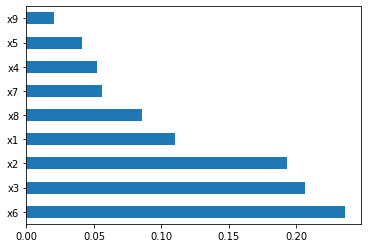

In [31]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

consequently, it seems that x6, x2, x3 are the most important features.

In [50]:
x_train = torch.Tensor(df_train[['x2', 'x3','x6', 'x1']].replace({'?':0}).values.astype(np.uint8))
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_train = torch.Tensor(df_train['class'].replace({2:0, 4:1}).values.astype(np.uint8))
#print(y_train)

# define scatter plot function

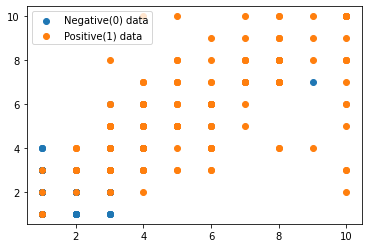

In [51]:
def scatterplot(X, y):
  plt.scatter(X[y==0, 0], X[y==0, 1], label='Negative(0) data')
  plt.scatter(X[y==1, 0], X[y==1, 1], label='Positive(1) data')  
  plt.legend(loc='best')

#scatterplot(x_train.numpy(), y_train.numpy())
scatterplot(x_train.numpy(), y_train.numpy().reshape(len(y_train),)) #[500, 1] -> [500, ]

# Define model class
z = w1*x1 + w2*x2 + w3*x3 ....  + w6*x6 + b  -> <br>
y = a = sigma(z) -> <br>
L(y_hat = a, y)


In [52]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x): 
    pred = torch.sigmoid(self.linear(x))
    return pred   #probability (not direct value)

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


# instantiate model class
torch.manual_seed(1)
model = LogisticRegression(x_train.shape[1], 1) # [500, 6]
print(list(model.parameters()))


[Parameter containing:
tensor([[ 0.2576, -0.2207, -0.0969,  0.2347]], requires_grad=True), Parameter containing:
tensor([-0.4707], requires_grad=True)]


# function to get model parameters (w1, w2, b)

In [53]:
[w, b] = model.parameters()
#print(w) 
w1, w2, w3, w4= w.view(x_train.shape[1])

def get_params():
  return (w1.item(), w2.item(), b[0].item())

# show the initial fit plot

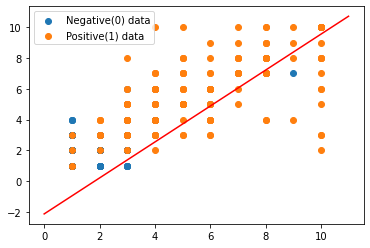

In [54]:
def fitplot():
  w1, w2, b = get_params()
  x1 = np.array([0, 11])
  # 0 = w1x1 + w2x2 + b
  x2 = (w1*x1 + b)/(-w2)
  plt.plot(x1, x2, 'r')
  scatterplot(x_train.numpy(), y_train.numpy().reshape(len(y_train),))
  plt.show()

fitplot()


# training the model 

In [55]:
# instantitate optimizer 
criterion = nn.BCELoss()  # = nn.CrossEntropyLoss() # for LR with more than 2 classes
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)#여기서 l2파라미터 조정 가능/weight-decay

# training the model 
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)

  # calculrate loss 
  loss = criterion(y_pred, y_train)
  print("epoch: ", i, "loss: ", loss.item())
  losses.append(loss.item())

  optimizer.zero_grad() # clear gradients wrt parameters
  loss.backward()
  optimizer.step()

epoch:  0 loss:  0.6470751762390137
epoch:  1 loss:  0.6329346895217896
epoch:  2 loss:  0.6227701902389526
epoch:  3 loss:  0.6143816709518433
epoch:  4 loss:  0.6069008708000183
epoch:  5 loss:  0.5999597907066345
epoch:  6 loss:  0.5933936238288879
epoch:  7 loss:  0.58712238073349
epoch:  8 loss:  0.5811054706573486
epoch:  9 loss:  0.575319766998291
epoch:  10 loss:  0.5697505474090576
epoch:  11 loss:  0.5643864870071411
epoch:  12 loss:  0.5592193603515625
epoch:  13 loss:  0.5542402267456055
epoch:  14 loss:  0.5494425296783447
epoch:  15 loss:  0.5448191165924072
epoch:  16 loss:  0.5403624773025513
epoch:  17 loss:  0.5360664129257202
epoch:  18 loss:  0.5319247841835022
epoch:  19 loss:  0.5279310345649719
epoch:  20 loss:  0.5240789651870728
epoch:  21 loss:  0.5203629732131958
epoch:  22 loss:  0.5167770981788635
epoch:  23 loss:  0.5133163332939148
epoch:  24 loss:  0.5099751949310303
epoch:  25 loss:  0.5067483186721802
epoch:  26 loss:  0.5036311745643616
epoch:  27 los

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


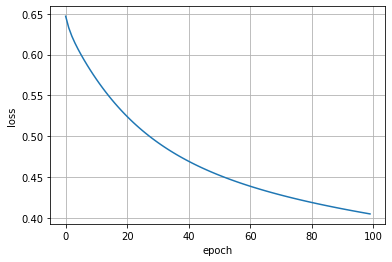

In [56]:
# log loss
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()


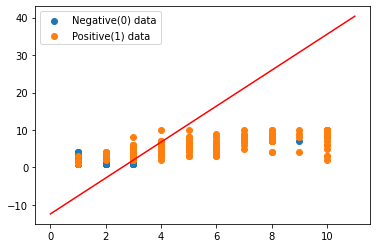

In [57]:
fitplot()

# model evalation with new datasets the model has never seen before

In [58]:
# use panda and io pachage to load txt. 
df_test = pd.read_csv(io.StringIO(uploaded_test['Test_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
#print(df_test)
#replace missing value ? with 0
x_test = torch.Tensor(df_test[[ 'x2', 'x3', 'x6', 'x1']].replace({'?':0}).values.astype(np.uint8))
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_test = torch.Tensor(df_test['class'].replace({2:0, 4:1}).values.astype(np.uint8))
#print(y_test)

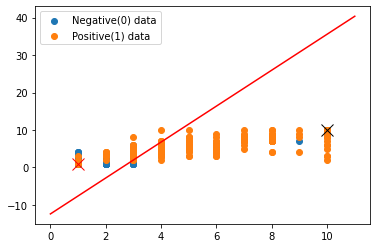

red x (+, 1) prob= 0.2644255757331848
red x's class = 0
blk x (+, 1) prob= 0.8789862394332886
blk x's class = 1


In [59]:
pnt1_idx = 0
pnt2_idx = 6

plt.plot(x_test.numpy()[pnt1_idx, 0], x_test.numpy()[pnt1_idx, 1], 'rx', markersize=12)
plt.plot(x_test.numpy()[pnt2_idx, 0], x_test.numpy()[pnt2_idx, 1], 'kx', markersize=12)
fitplot()
print("red x (+, 1) prob= {}".format(model.forward(x_test[pnt1_idx]).item()))
print("red x's class = {}".format(model.predict(x_test[pnt1_idx])))
print("blk x (+, 1) prob= {}".format(model.forward(x_test[pnt2_idx]).item()))
print("blk x's class = {}".format(model.predict(x_test[pnt2_idx])))


In [63]:
#model test w/ all test datasets
no_correct = 0
for i in range(len(x_train)):
  if model.predict(x_train[i]) == y_train[i]:
    no_correct += 1

accuracy = no_correct/len(x_train)*100
print("Predcition accuracy_train= {}%".format(accuracy))

no_correct_test=0
for i in range(len(x_test)):
  if model.predict(x_test[i]) == y_test[i]:
    no_correct_test += 1

accuracy = no_correct_test/len(x_test)*100

print("Predcition accuracy_test= {}%".format(accuracy))

Predcition accuracy_train= 89.60000000000001%
Predcition accuracy_test= 96.98492462311557%


[x1, x2, x3, x6]==> 97%accuracy